# Classification

In this exercise we are going through the application of different classification methods and related concepts.

# Submission

In order to submit on gradescope, you need to submit the following:
- the homework jupyter notebook it self ```hw7.ipynb```
- the pdf generated from the notebook, you can get the pdf from ```File->Print Preview```
- the .py file generated from the notebook, you can get the .py file from ```File->Download as->Python(.py)```

# 1. QMNIST Classification 

In [1]:
# import some libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import pickle
np.set_printoptions(suppress=True)

## 1.1 Load your data

In [2]:
import pickle


with open('datasets/qmnist.pkl', 'rb') as f:
    data = pickle.load(f)
train_data =data['train_data']
train_labels = pd.DataFrame(data['train_labels']).values.ravel()

test_data = data['test_data']
test_labels = pd.DataFrame(data['test_labels']).values.ravel()

In [3]:
train_data.shape, test_data.shape

((60000, 784), (50000, 784))

## 1.2 Plot your data

Each QMNIST data point represents a 28 * 28 pixel hand written digit. Complete the following code to plot the first five data point from the train dataset.

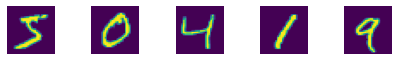

In [4]:
# np.array.reshape might be useful.
fig, axes = plt.subplots(1, 5, figsize=(6, 6))
fig.tight_layout()

for i in range(5):
    axes[i].imshow(train_data[i].reshape(28,28))
    axes[i].axis('off')
plt.show()

## 1.3 Naive Bayes

sklearn has two different implementions of naive bayes that we can use for this problem: 
- ```CategoricalNB()```
- ```GaussianNB()```  

Let's take a loot at both of them.

In [5]:
from sklearn.naive_bayes import CategoricalNB, GaussianNB

### 1.3.1 CategoricalNB

In CategoricalNB, we assume that each feature in the dataset is categorical. Therefore, the The probability of category $t$ in feature $i$ given class $c$ is estimated as:  
<div align='center'>
    <span style="font-size:1.5em;">$P(x_i=t|y=c; \alpha)=\frac{N_tic+\alpha}{N_c+\alpha n_i}$</span>
</div>
This is just what we see in class, with $\alpha$ being the smoothing variable.

Your task here is to draw out the test accuracy score for $\alpha$ between 0 and 2 with step to be 0.1.

In [6]:
# train models
import numpy as np
from sklearn.metrics import accuracy_score
alpha_list=[]
accuracy_list=[]
train_labels = train_labels.ravel()
test_labels = test_labels.ravel()
# print(train_data.shape,train_labels.shape,test_data.shape,test_labels.shape)
# print(type(train_data),train_labels.shape,type(test_data),test_labels.shape)
for alpha in np.arange(0.0, 2.1, 0.1):
    alpha_list.append(alpha)
    model = CategoricalNB(alpha=alpha,min_categories=256)
    model.fit(train_data,train_labels)
    y_pre = model.predict(test_data)
    acc=accuracy_score(test_labels,y_pre)
    accuracy_list.append(acc)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/naive_bayes.py:508: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


<AxesSubplot:xlabel='alpha'>

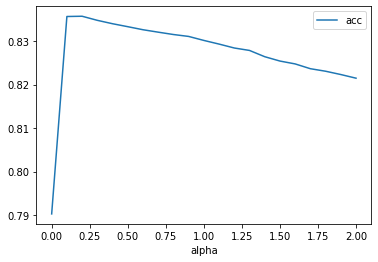

In [7]:
# make the plot
from pandas.core.frame import DataFrame
df={"alpha" : alpha_list,
   "acc" : accuracy_list}#将列表a，b转换成字典
df=DataFrame(df)

df.groupby(['alpha']).agg({'acc':'sum'}).plot()

### Question: Describe how test accuracy changes and explain.
With the increasing of alpha, the test accuracy first increase then decrease.  
That is because when alpha is very small, the model is overfitted. When alpha becomes larger, the model becomes underfitted.

### 1.3.2 GaussianNB

In GaussainNB, we no longer assume each feature is categorical. Instead, we assume the likelyhood of each feature follows a Gaussain Distribution:

<div align='center'>
    <span style="font-size:1.5em;">$P(x_i|y)=\frac{1}{\sqrt{2\pi\sigma^{2}_{y}}}\exp{(-\frac{(x_i-\mu_y)^2}{2\sigma_y^2})}$</span>
</div>

Again draw out the test accuracy score for $var\_smoothing$ between 0 and 2 with step to be 0.1.

In [8]:
# train models
var_list=[]
acc_list=[]
for var in np.arange(0.0, 2.1, 0.1):
    var_list.append(var)
    model = GaussianNB(var_smoothing=var)
    model.fit(train_data,train_labels)
    y_pre = model.predict(test_data)
    acc=accuracy_score(test_labels,y_pre)
    acc_list.append(acc)
# var_list,acc_list

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/naive_bayes.py:452: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/naive_bayes.py:453: RuntimeWarning: divide by zero encountered in true_divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) /
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/naive_bayes.py:453: RuntimeWarning: invalid value encountered in true_divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) /


<AxesSubplot:xlabel='alpha'>

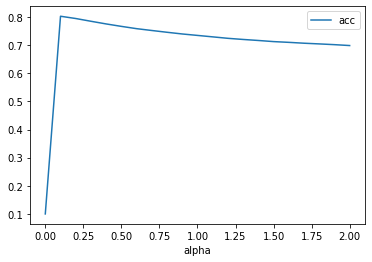

In [9]:
# make the plot
df1={"alpha" : var_list,
   "acc" : acc_list}#将列表a，b转换成字典
df1=DataFrame(df1)
df1.groupby(['alpha']).agg({'acc':'sum'}).plot()

### Question: Compare the performance of the model with $var\_smoothing=0$ and the model with $var\_smoothing$ being other values. What do you find? How would you explain this senario? 
Hint: Take a look at the warning messages generated when you run the models. sklearn documentation might also be useful. 
The variance shows in denominator, but sometimes it could be 0. To solve this problem, var_smoothing is added to prevent the denominator being 0. In our datasets, some features's variance is 0, so when var_smoothing is equal to 0, it would fail and result in low accuracy.

### Question: Comparing the test accuracy between the above two different Naive Bayes models. Which one has a relatively low score? What might be the cause?
The GaussainNB has lower score. The reason is that the distribution of the dataset is not close to Gaussain distribution.

## 1.4 Confusion Matrix

In this section, we would like to analyze the confusion matrix of a given model.

The following is the definition of a confusion matrix:  

By definition a confusion matrix $C$ is such that $C_{i, j}$
is equal to the number of observations known to be in group $i$ and
predicted to be in group $j$.

For confusion matrix, use `sklearn.metrics.confusion_matrix`

Firstly, compute confusion matrix using ```CategoricalNB``` with $\alpha=0.5$ and test data.

In [10]:
model = CategoricalNB(alpha=0.5,min_categories=256)
model.fit(train_data,train_labels)
y_pre = model.predict(test_data)
accuracy_score(test_labels,y_pre)

0.8333

<AxesSubplot:>

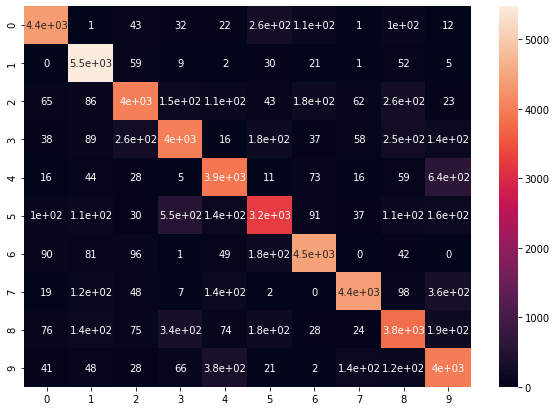

In [11]:
from sklearn.metrics import confusion_matrix

labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
cm=confusion_matrix(test_labels, y_pre)
df_cm = pd.DataFrame(cm, index = [i for i in labels],
                  columns = [i for i in labels])
# print(df_cm)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

### Question: What are the top five confusing pairs (i -> j) of classes for you model? What might be the cause?
4->9  5->3  9->4  7->9  8->3  These numbers have same features or structure partially, which makes the classfier hard to differentiate.

# 2. Binary Classification

Now we have gone over a problem with 10 classes. Let's take a deeper look at the classification on a relatively simple dataset. 

## 2.1 Binary Dateset 1

Note that we have two binary datasets in the fold you downloaded. Let's first take a look at the first one.

In [12]:
df = pd.read_csv('datasets/binary_dataset1.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V26,V27,V28,Amount,Class
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,0.177840,0.261145,-0.143276,0.00,1
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-0.145362,-0.252773,0.035764,529.00,1
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.542628,0.039566,-0.153029,239.93,1
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-0.657488,-0.827136,0.849573,59.00,1
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,0.566797,-0.010016,0.146793,1.00,1


Let's take a look at the class distribution. Your task here is to draw a bar chart with each bar representing a simple class.

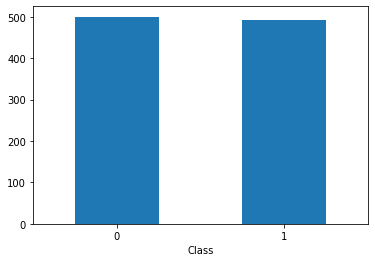

In [13]:
# Make the bar chart
df1=df.groupby(['Class'],as_index=True)['Amount'].count()
ax = df1.plot.bar(x='Class', y='Amount', rot=0)

Before training any model, you need to get the X and y out of the dataframe and do train test split

In [14]:
# Get X and y from the dataset
y = df[["Class"]].values.ravel()

X = df.drop(["Class"], axis=1)

In [15]:
# Do train test split with random_state=0 and test_size=0.5
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=0, shuffle=True)

### 2.1.1 Naive Bayes in Binary Classification

First we want to solve this problem using Naive Bayes model with proper parameter. Choose a proper Naive Bayes class to solve this priblem. Report your test accuracy.

In [16]:
# Your test accuracu should be around 0.84
var=None
max_acc=0.0
var_list=[]
acc_list=[]
for var in np.arange(0.0, 2.1, 0.1):
    var_list.append(var)
    model = GaussianNB(var_smoothing=var)
    model.fit(X_train,y_train)
    #y_pre = model.predict(X_test)
    #acc=accuracy_score(y_test,y_pre)
    acc=model.score(X_test,y_test)
    acc_list.append(acc)
var_list,acc_list
max_acc=max(acc_list)
var=var_list[acc_list.index(max_acc)]
var,max_acc

(0.0, 0.9737903225806451)

### 2.1.2 Using Regression for Classification

Since this is a binary classification problem, we can solve it in the following steps:
1. Fit a linear regression model
2. Get your raw predicted values $x_r$ from the model
3. Find a threshold $\epsilon$ in a way such that 
4. Get your final predicted class $x_c$ in a way that $x_c=0$ if $x_r<\epsilon$, otherwsie $x_c=1$  

One way to choose the $\epsilon$ here is to find the one that maximize the train accuracy, and then apply to test data.  

So your task here is to create such a model, find $\epsilon$, and report test accuracy.

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
model = LinearRegression()
model.fit(X_train,y_train)
y_train_pre = model.predict(X_train)
train_acc=0
eps=0
for epsilon in y_train_pre:
    y_tmp = (y_train_pre >= epsilon) 
    acc=accuracy_score(y_train,y_tmp)
    if train_acc<acc:
        eps=epsilon
        train_acc=acc
y_test_pre=model.predict(X_test)
y_test_pre=(y_test_pre>=eps) 
test_acc=accuracy_score(y_test,y_test_pre)
eps,train_acc,test_acc

(0.3218698768683306, 0.9899193548387096, 0.9798387096774194)

Write down what you find here:
- $\epsilon$ = 0.3218698768683306
- train_accuracy = 0.9899193548387096
- test_accuracy = 0.9798387096774194

### Question: Can you think of any model you learnt from class that is similar to this way of doing classification?
It's very similar to perceptron model. The perceptron model uses activiation function and a threshold to make prediction.

## 2.2 Binary dataset 2

Then let's take a look at the second binary dataset.  

As usual, we take a look at the class distribution.

In [19]:
df = pd.read_csv('datasets/binary_dataset2.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V26,V27,V28,Amount,Class
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,0.177840,0.261145,-0.143276,0.00,1
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-0.145362,-0.252773,0.035764,529.00,1
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.542628,0.039566,-0.153029,239.93,1
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-0.657488,-0.827136,0.849573,59.00,1
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,0.566797,-0.010016,0.146793,1.00,1


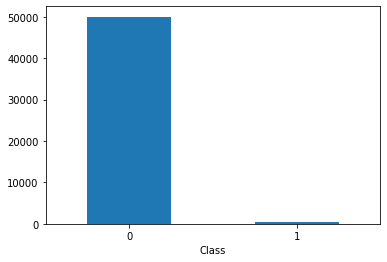

In [20]:
# Make the bar chart
df1=df.groupby(['Class'],as_index=True)['Amount'].count()
ax = df1.plot.bar(x='Class', y='Amount', rot=0)

### Question: Compare the distribution with the first dataset. What do you find?

Again you need to get the X and y out the dataframe and do train test split.

In [21]:
# Get X and y from dataset
y = df[["Class"]].values.ravel()

X = df.drop(["Class"], axis=1)

In [22]:
# Do train test split with random_state=0 and test_size=0.5
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=0, shuffle=True)

### 2.2.1 Accuracy for Naive Bayes

Let's train a Naive Bayes model again. Similar with 2.1.1, choose a proper Naive Bayes class with a proper smoothing variable to solve this priblem. Report your test accuracy.

In [23]:
var=None
max_acc=0.0
var_list=[]
acc_list=[]
for var in np.arange(0.0, 2.1, 0.1):
    var_list.append(var)
    model = GaussianNB(var_smoothing=var)
    model.fit(X_train,y_train)
    y_pre = model.predict(X_test)
    acc=accuracy_score(y_test,y_pre)
    acc_list.append(acc)
var_list,acc_list
max_acc=max(acc_list)
var=var_list[acc_list.index(max_acc)]
var,max_acc

(0.1, 0.9952863820011091)

### Question: According to your accuracy score, how would you evaluate your model?
Even though the accuracy is high, the model can achieve this by always predicting 0 label. Maybe we should find other metrics such as recall, precision to judge our model.


### 2.2.2 Confusion Matrix and Different Metrics

![avatar](./pictures/confusionmatrix.svg)

A very important tool to debug classifiers is the confusion matrix. For binary classification, it contains four different cells:

- **True positives (TP)**: observations that were predicted as belonging to the positive class correctly.

- **False positives (FP)**: observations that were predicted as belonging to the positive class incorrectly.

- **True negatives (TN)**: observations that were predicted as belonging to the negative class correctly.

- **False negatives (FN)**: observations that were predicted as belonging to the negative class incorrectly.

These are all interesting in and of themselves, but they can also be combined in aggregate metrics such as:

- **Accuracy**: how often are we predicting the class label?
- **Precision**: how many of our positive outcomes are actually positive?
- **Recall/Sensitivity**: how many of the positive outcomes are we able to recall?
- **Fall-Out**: how many of our negative outcomes are actually positive?

Suppose each data point in the data set represents a patient, and the class 1 represensts a patient is tested positive for a desease while 0 means tested negative. Choose a metric and report the metric score you choose for your model.

<AxesSubplot:>

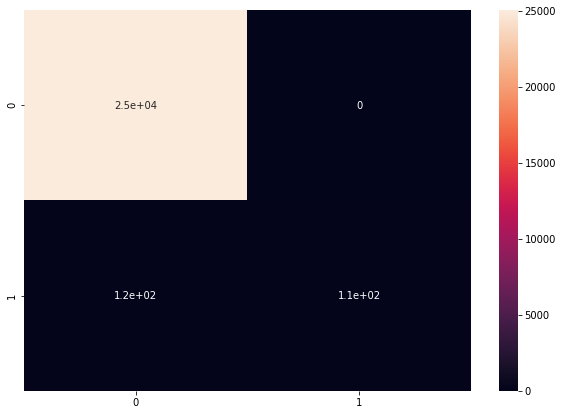

In [24]:
# Draw your confusion matrix here

model = GaussianNB(var_smoothing=var)
model.fit(X_train,y_train)
y_pre = model.predict(X_test)


labels = [0, 1]
cm=confusion_matrix(y_test, y_pre)
df_cm = pd.DataFrame(cm, index = [i for i in labels],
                  columns = [i for i in labels])
# print(df_cm)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

In [25]:
# Calculate the metric you chose here
from sklearn.metrics import recall_score
recall=recall_score(y_test,y_pre)
recall

0.48484848484848486

### Question: Is the metric you chose higher is better or lower is better in this situation? What would you say about your model using the metric you chose?

Higher is better. The outcome of misdiagnosis is very severe. If we test a sick person and get negative, then we let the person go home, he may lose his life or more people will get infected due to high infectivity. But it is acceptable that we misdiagnose a healthy person as a sick person, after doing some follow-up checkup, the person can go home.